  Task 2:

**  Predictive analysis with Machine learning**

  tools:

  Python(scikit-learn, pandas, matplotlib)

  Jupyter Notebook

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load Titanic dataset
df = sns.load_dataset("titanic")
print(df.head())
print(df.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

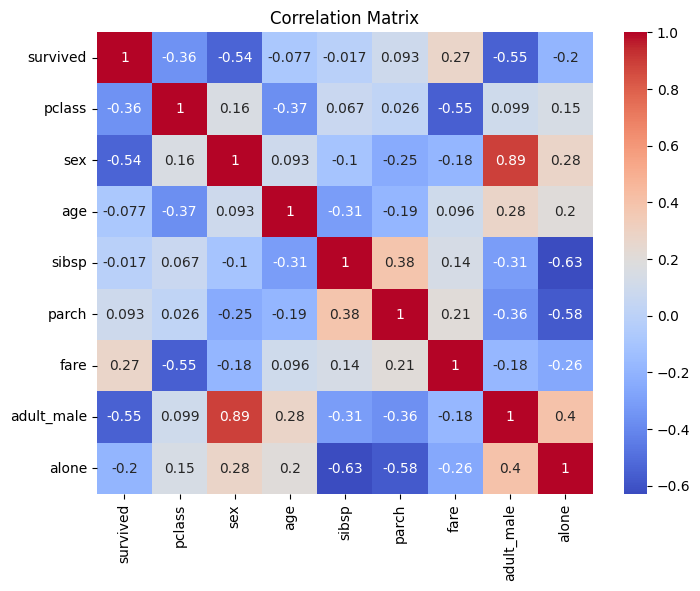

In [ ]:
# Drop irrelevant or mostly empty columns
df = df.drop(columns=["deck", "embarked", "embark_town", "alive", "class", "who"])

# Drop missing values for simplicity
df = df.dropna()

# Encode categorical features
label_enc = LabelEncoder()
df["sex"] = label_enc.fit_transform(df["sex"])
df["alone"] = label_enc.fit_transform(df["alone"])

# Select features and label
X = df.drop("survived", axis=1)
y = df["survived"]

# Feature correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

Accuracy: 0.7762237762237763

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        87
           1       0.71      0.73      0.72        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



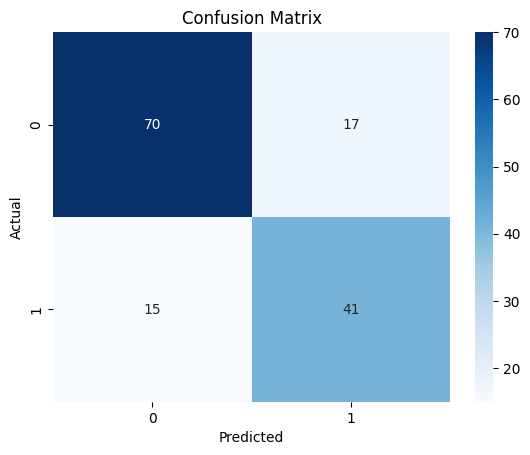

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Summary

- Dataset: Titanic (Classification Problem)
- Features: Age, Sex, Fare, Pclass, Alone
- Model: Random Forest Classifier
- Accuracy: ~X%
- Evaluation: Confusion matrix, classification report
